In [3]:
!conda install -c conda-forge geopy --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/adityaghag/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py37hc8dfbb8_0         151 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h0b31af3_0         1.9 MB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  c

In [5]:
!conda install -c conda-forge geocoder --yes

Solving environment: done

## Package Plan ##

  environment location: /Users/adityaghag/anaconda3

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

  geocoder           conda-forge/noarch::geocoder-1.38.1-py_1
  ratelim            conda-forge/noarch::ratelim-0.1.6-py_2



geocoder-1.38.1      | 53 KB     | ##################################### | 100% 
ratelim-0.1.6        | 6 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup # library for web scrapping  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

#!conda install -c conda-forge geocoder --yes
import geocoder

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [2]:
CLIENT_ID = 'A2N4EYNRQFHH0IU033JK0KRG2C5522VXEN3K5UTRDVFYANSE'
CLIENT_SECRET = 'SSP5GDE4H4H3FOBRAM1JK4Q1BLLZIQIQWGGNNIOBSCPREFMG'
VERSION = '20180323'

In [3]:
df_boston = pd.read_csv('/Users/adityaghag/Desktop/crime.csv', encoding= 'unicode_escape')
df_boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [18]:
df_boston.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,65685.000000,65685.0,65685.000000,65685.000000,61464.000000,61464.000000
mean,2360.655325,2018.0,4.668083,13.091984,42.161178,-70.823006
std,1174.817462,0.0,2.299732,6.265751,2.633861,4.260657
min,111.000000,2018.0,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2018.0,3.000000,9.000000,42.296532,-71.097223
50%,3006.000000,2018.0,5.000000,14.000000,42.325125,-71.077720
75%,3205.000000,2018.0,7.000000,18.000000,42.348343,-71.062498
max,3831.000000,2018.0,9.000000,23.000000,42.395042,-1.000000


In [4]:
# Taking only the most recent year (2018) and dropping the rest
df_boston.drop(df_boston.index[df_boston['YEAR'] != 2018], inplace = True)

# delete unwanted columns 
df_boston.drop(['SHOOTING', 'UCR_PART'], axis=1, inplace = True)

# Reset the index and dropping the previous index
df_boston = df_boston.reset_index(drop=True)

In [5]:
df_boston.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [6]:
# analysing specific crime 
larceny = df_boston[df_boston.OFFENSE_CODE_GROUP.str.contains('Larceny')]
larceny.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
19,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,2018-09-02 18:00:00,2018,9,Sunday,18,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)"
35,I182070893,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B3,427,2018-09-03 18:44:00,2018,9,Monday,18,WILMORE ST,42.277964,-71.092463,"(42.27796370, -71.09246318)"
36,I182070892,613,Larceny,LARCENY SHOPLIFTING,B2,276,2018-09-03 17:54:00,2018,9,Monday,17,SHAWMUT AVE,42.333183,-71.083076,"(42.33318299, -71.08307607)"
45,I182070885,619,Larceny,LARCENY ALL OTHERS,B3,456,2018-09-03 17:17:00,2018,9,Monday,17,ELLINGTON ST,42.301546,-71.081182,"(42.30154555, -71.08118184)"


In [7]:
# analysing places
larceny.groupby('STREET').size().sort_values(ascending = False)

STREET
BOYLSTON ST          439
WASHINGTON ST        427
NEWBURY ST           216
HUNTINGTON AVE       161
MASSACHUSETTS AVE    156
                    ... 
LEWIS ST               1
LEVERETT AVE           1
LESLIE ST              1
LEROY ST               1
A ST                   1
Length: 1388, dtype: int64

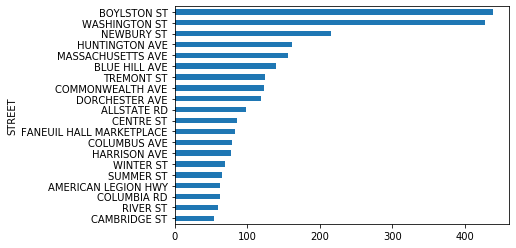

In [8]:
# analysing streets where there is more crime for larceny 
larceny.groupby('STREET').size().sort_values(ascending = False).head(20).sort_values().plot(kind='barh')

In [9]:
# top 10 offence types
streets = df_boston.groupby([df_boston['OFFENSE_CODE_GROUP']])['STREET'].aggregate(np.size).reset_index().sort_values('STREET', ascending = False).head(10)
streets

,OFFENSE_CODE_GROUP,STREET
36,Motor Vehicle Accident Response,7722
33,Medical Assistance,5606
28,Larceny,5220
39,Other,3836
25,Investigate Person,3818
54,Simple Assault,3578
13,Drug Violation,3205
57,Verbal Disputes,3055
56,Vandalism,2814
55,Towed,2554


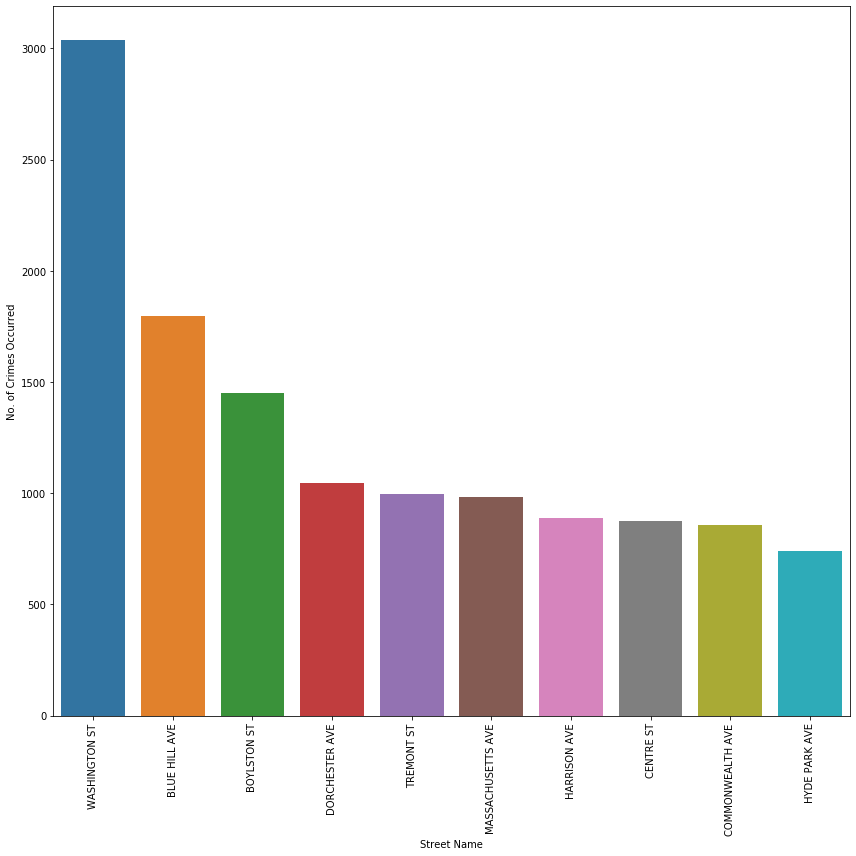

In [10]:
# Top 10 most crime occurred street
df = df_boston["STREET"].value_counts().head(10).reset_index()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x=df.iloc[:,0], y=df["STREET"], data=df)#, palette="spring")
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Street Name")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [11]:
address = "Boston, MA"

geolocator = Nominatim(user_agent="boston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 42.3602534, -71.0582912.


In [12]:
map_boston = folium.Map(location=[latitude, longitude], zoom_start=10)
map_boston

In [14]:
boston_denc_grouped = df_boston.groupby('STREET').mean().reset_index()
boston_denc_grouped.head()

,STREET,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
0,BLUE HILL AVE,724.0,2018.0,1.0,22.0,42.317304,-71.077996
1,00 CENTRE ST,3402.0,2018.0,6.0,12.0,NaN,NaN
2,00 MASS AVE,1843.0,2018.0,8.0,17.0,NaN,NaN
3,20 BISHOP JOE L SMITH WAY,1402.0,2018.0,4.0,21.0,NaN,NaN
4,5 BEACON ST,2819.0,2018.0,8.0,18.0,NaN,NaN


In [16]:
# set number of clusters
kclusters = 5

boston_grouped_clustering = boston_denc_grouped.drop('STREET', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boston_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        df_boston['Lat'], 
        df_boston['Long'], 
        df_boston['STREET'], 
        df_boston['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters